# Recursive Feature Elimination

In [1]:
import pandas as pd
from scripts import preprocess as ref

ORIGINAL_CSV = '../data/UNSW-NB15-BALANCED-TRAIN.csv'

origin = pd.read_csv(ORIGINAL_CSV, encoding='ISO-8859-1', low_memory=False)
df = ref.preprocess_data(origin)

df['srcip'] = pd.factorize(df['srcip'])[0]
df['dstip'] = pd.factorize(df['dstip'])[0]

## 'Label' Feature

In [2]:
x = df.drop(['attack_cat', 'Label'], axis=1)
y_Label = df['Label']

In [3]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

classifier_Label = LogisticRegression()
rfe_Label = RFE(classifier_Label, n_features_to_select=20, step=1)
rfe_Label.fit(x, y_Label)
print("\nSelected feature names:", rfe_Label.get_feature_names_out())
print("Feature ranking:", rfe_Label.ranking_)


Selected feature names: ['sport' 'dsport' 'sbytes' 'dbytes' 'sttl' 'dttl' 'Sload' 'Dload' 'swin'
 'dwin' 'stcpb' 'dtcpb' 'dmeansz' 'res_bdy_len' 'Sjit' 'Djit' 'Stime'
 'Ltime' 'Sintpkt' 'Dintpkt']
Feature ranking: [28  1 27  1 13 16 17  1  1  1  1 15  6 18  1  1  3  2  1  1  1  1  4  1
 20  1  1  1  1  1  1  1 21 23 22 25 14 19 26 24  7  8 12 10  9 11  5]


<AxesSubplot: title={'center': 'Correlation with Label'}>

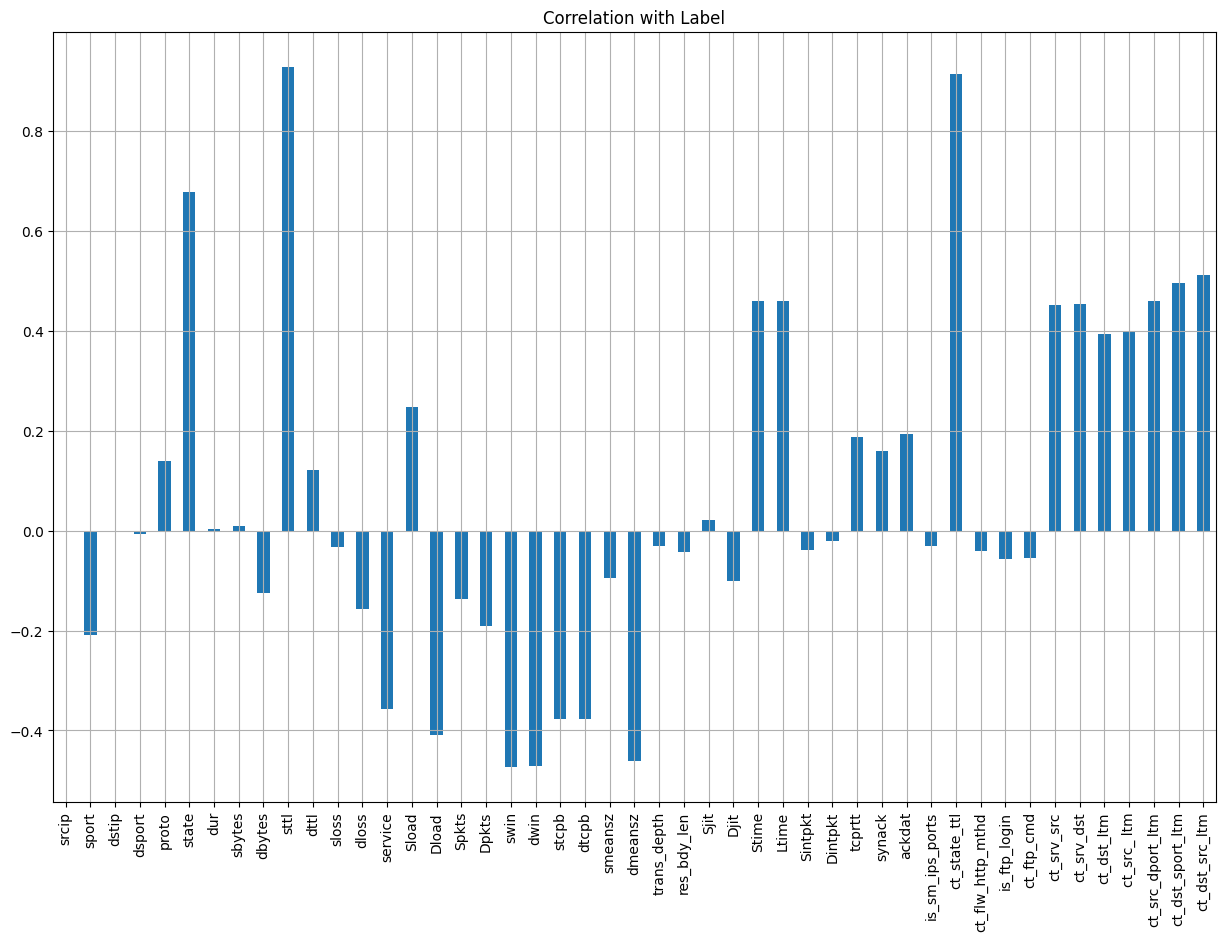

In [4]:
x.corrwith(df.Label).plot.bar(figsize = (15, 10),
                                    title = "Correlation with Label",
                                    fontsize = 10,
                                    grid = True)

## 'attack_cat' Feature

In [5]:
y_attack_cat = df['attack_cat']

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

classifier_attack_cat = DecisionTreeClassifier()


# StandardScaler()
# classifier_attack_cat = LogisticRegression(penalty='l1',
#                                            max_iter=50000,
#                                            solver='saga')
rfe_attack_cat = RFE(classifier_attack_cat, n_features_to_select=20, step=1)
rfe_attack_cat.fit(x, y_attack_cat)
print("\nSelected feature names:", rfe_attack_cat.get_feature_names_out())
print("Feature ranking:", rfe_attack_cat.ranking_)


Selected feature names: ['sport' 'dsport' 'proto' 'dur' 'sbytes' 'dbytes' 'sttl' 'service' 'Sload'
 'Dpkts' 'stcpb' 'dtcpb' 'smeansz' 'dmeansz' 'Stime' 'Ltime' 'Sintpkt'
 'synack' 'ackdat' 'ct_srv_dst']
Feature ranking: [28  1 27  1  1 20  1  1  1  1 22  4 13  1  1  5 15  1 24 25  1  1  1  1
 19 12  8  2  1  1  1 10  6  1  1 26  7 17 21 23  3  1 14  9 16 18 11]


<AxesSubplot: title={'center': 'Correlation with attack_cat'}>

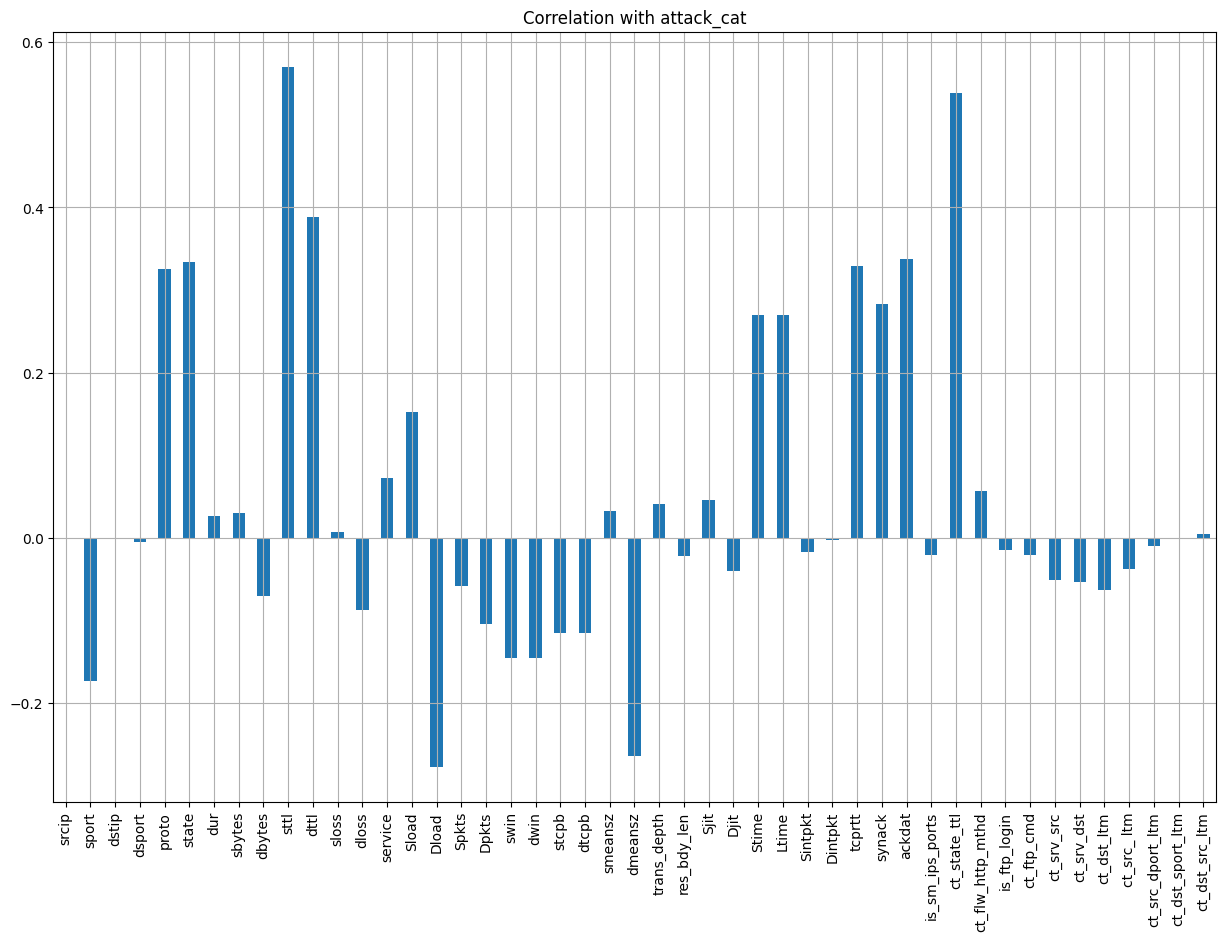

In [7]:
x.corrwith(df.attack_cat).plot.bar(figsize = (15, 10),
                                   title = "Correlation with attack_cat",
                                   fontsize = 10,
                                   grid = True)